# Segundo Parcial
Apellidos y Nombres: Torres Loayza Alberto Antonio
Carrera: Ingeniería de Sistemas

## 1. Aprendizaje No Supervisado
Se aplicará el algoritmo K-means clustering para aprendizaje no supervisado a un dataset sobre detección de enfermedades cardiovasculares.

### 1.1 Preprocesamiento del Dataset
El preprocesamiento del dataset implica la lectura del mismo por medio de pandas, la eliminación de columnas irrelevantes como "id", la simulación para aprendizaje no supervisado y la normalización de los valores.

In [2]:
import pandas as pd
import numpy as np

data = pd.read_excel("cardio_train.xlsx")
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Observamos que el dataset tiene m = 69301 ejemplos y n = 13 características, sin embargo, la columna "id" no es relevante para el objetivo del modelo por lo que la eliminamos, así mismo, eliminamos la etiqueta o columna objetivo "cardio" para simular un dataset que no tiene etiquetas para aprendizaje no supervisado, quedando n = 11 características que serían:
1.	Edad | Característica objetivo | Edad | int (días)
2.	Género | Característica objetivo | Género | 1: mujer, 2: hombre |
3.	Altura | Característica objetivo | Altura | int (cm) |
4.	Peso | Característica objetivo | Peso | flotador (kg) |
5.	Presión arterial sistólica | Función de examen | ap_hi | int |
6.	Presión arterial diastólica | Función de examen | ap_lo | int |
7.	Colesterol | Función de examen | Colesterol | 1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal |
8.	Glucosa | Función de examen | gluc | 1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal |
9.	Fumar | Característica subjetiva | Humo | 0: no fuma, 1: fuma |
10.	Ingesta de alcohol | Característica subjetiva | ALCO | 0: no consume alcohol, 1: consume alcohol |
11.	Actividad física | Característica subjetiva | Activo | 0: no es activo, 1: activo |


In [12]:
X = data.copy()
X.drop(columns = ['id','cardio'], inplace=True)
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,22469,1,155,69.0,130,80,2,2,0,0,1
1,14648,1,163,71.0,110,70,1,1,0,0,1
2,21901,1,165,70.0,120,80,1,1,0,0,1
3,14549,2,165,85.0,120,80,1,1,1,1,1
4,23393,1,155,62.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,168,76.0,120,80,1,1,1,0,1
69297,22601,1,158,126.0,140,90,2,2,0,0,1
69298,19066,2,183,105.0,180,90,3,1,0,1,0
69299,22431,1,163,72.0,135,80,1,2,0,0,0


In [39]:
y = data['cardio']
y

0        0
1        1
2        0
3        0
4        0
        ..
69296    0
69297    1
69298    1
69299    1
69300    0
Name: cardio, Length: 69301, dtype: int64

Normalizamos los datos de X con StandarScaler de Scikit Learn para trabajar con el algoritmo K-means posteriormente.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.21601824, -0.73302344, -1.14099939, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-1.95391548, -0.73302344, -0.16601717, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [ 0.98580185, -0.73302344,  0.07772839, ..., -0.31072844,
        -0.23864069,  0.49376463],
       ...,
       [-0.16325352,  1.36421285,  2.27143838, ..., -0.31072844,
         4.19040018, -2.02525646],
       [ 1.20061644, -0.73302344, -0.16601717, ..., -0.31072844,
        -0.23864069, -2.02525646],
       [ 0.43417421, -0.73302344,  0.68709227, ..., -0.31072844,
        -0.23864069,  0.49376463]], shape=(69301, 11))

### 1.2 Aplicación de algoritmo K-means clustering

Importamos Kmeans y definimos número de clústeres igual a 2 (k = 2) porque sabemos de antemano que nuestra intención es detectar si un paciente padece de una enfermedad cardiovascular (1) o si no padece (0).

In [16]:
from sklearn.cluster import KMeans
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)
y_pred

array([1, 0, 0, ..., 1, 0, 0], shape=(69301,), dtype=int32)

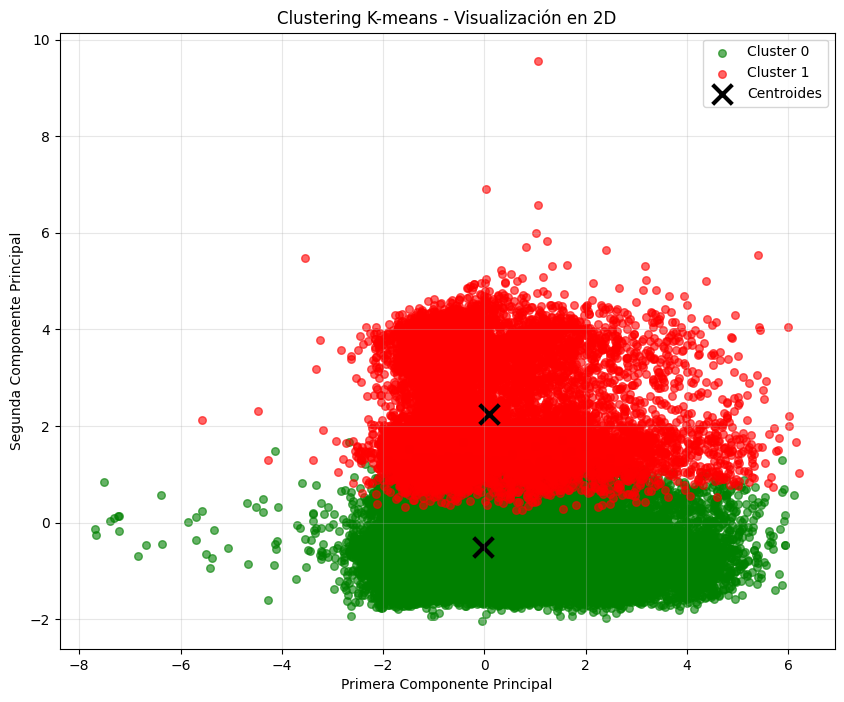

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 8))

colors = ['green', 'red']
for i in range(2):
    mask = y_pred == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=colors[i], 
                label=f'Cluster {i}', 
                alpha=0.6, 
                s=30)

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            c='black', marker='x', s=200, linewidths=3,
            label='Centroides')

plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Clustering K-means - Visualización en 2D')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Dados nuevos ejemplos podemos asignar un grupo a cada una de estas muestras (hard clustering) aplicando K-means a estos nuevos datos y prediciendo a qué cluster pertenecerán.

In [34]:
X_new = np.array([[10500, 1, 165, 65, 120, 80, 1, 1, 1, 1, 1], 
                  [19890, 1, 168, 84, 130, 70, 2, 3, 1, 0, 1], 
                  [25135, 1, 159, 51, 130, 100, 1, 1, 0, 0, 0], 
                  [18030, 2, 181, 98, 120, 100, 3, 3, 1, 1, 0]])
X_new_scaled = scaler.fit_transform(X_new)
kmeans.predict(X_new_scaled)

array([0, 1, 0, 1], dtype=int32)

### 1.3 Comparación de las etiquetas obtenidas por K-means con las reales

Graficamos los datos con las etiquetas reales y comparamos las graficas.

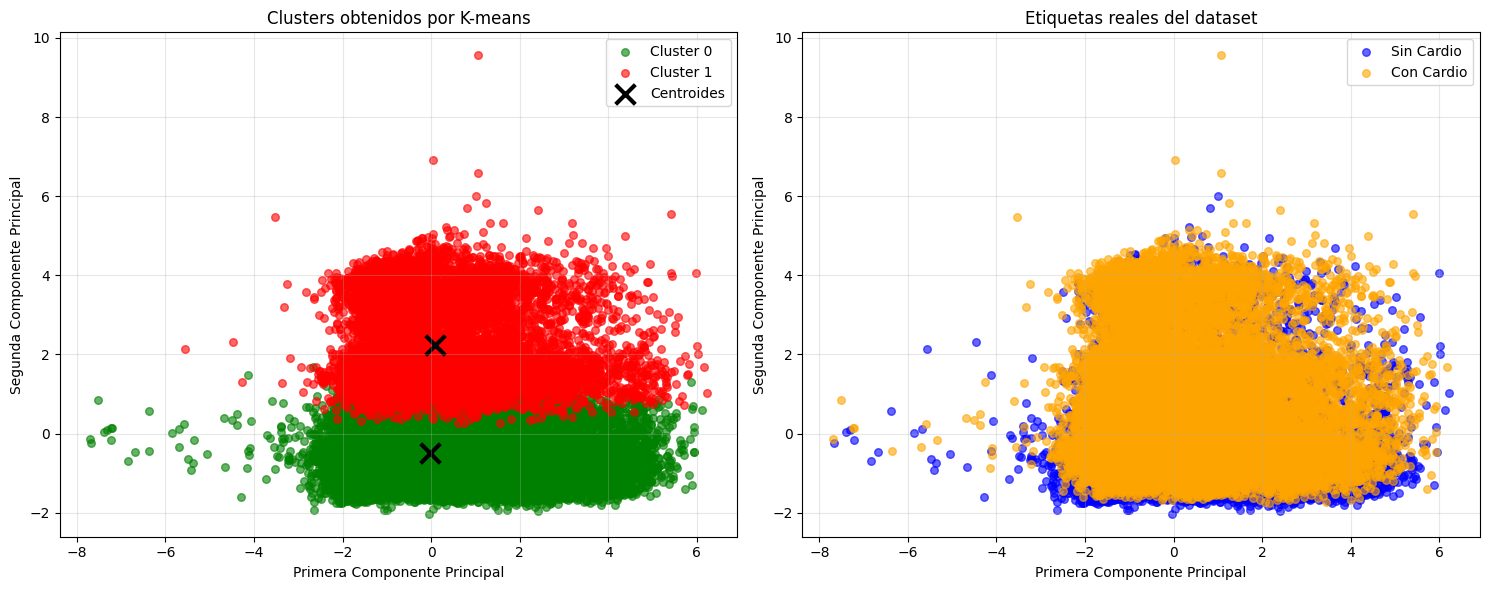

In [44]:
# Obtener las etiquetas reales que guardamos anteriormente
y_real = data['cardio']

# Crear visualización comparativa con PCA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# SUBPLOT 1: Clusters K-means
colors_clusters = ['green', 'red']
for i in range(2):
    mask = y_pred == i
    ax1.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=colors_clusters[i], 
                label=f'Cluster {i}', 
                alpha=0.6, 
                s=30)

# Agregar centroides
ax1.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            c='black', marker='x', s=200, linewidths=3,
            label='Centroides')

ax1.set_xlabel('Primera Componente Principal')
ax1.set_ylabel('Segunda Componente Principal')
ax1.set_title('Clusters obtenidos por K-means')
ax1.legend()
ax1.grid(True, alpha=0.3)

# SUBPLOT 2: Etiquetas reales
colors_real = ['blue', 'orange']
for i in range(2):
    mask = y_real == i
    ax2.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=colors_real[i], 
                label=f'Sin Cardio' if i == 0 else 'Con Cardio', 
                alpha=0.6, 
                s=30)

ax2.set_xlabel('Primera Componente Principal')
ax2.set_ylabel('Segunda Componente Principal')
ax2.set_title('Etiquetas reales del dataset')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

En conclusión, K-means SÍ encontró patrones reales - el cluster verde coincide bastante con la zona donde hay más "sin cardio" (azul).

### 1.4 Justificación del hiperparámetro k=2 con Silhouette score

Calculando silhouette scores...
k=2: Silhouette Score = 0.267
k=3: Silhouette Score = 0.290
k=4: Silhouette Score = 0.217
k=5: Silhouette Score = 0.154

Mejor k según Silhouette Score: k=3 (score: 0.290)


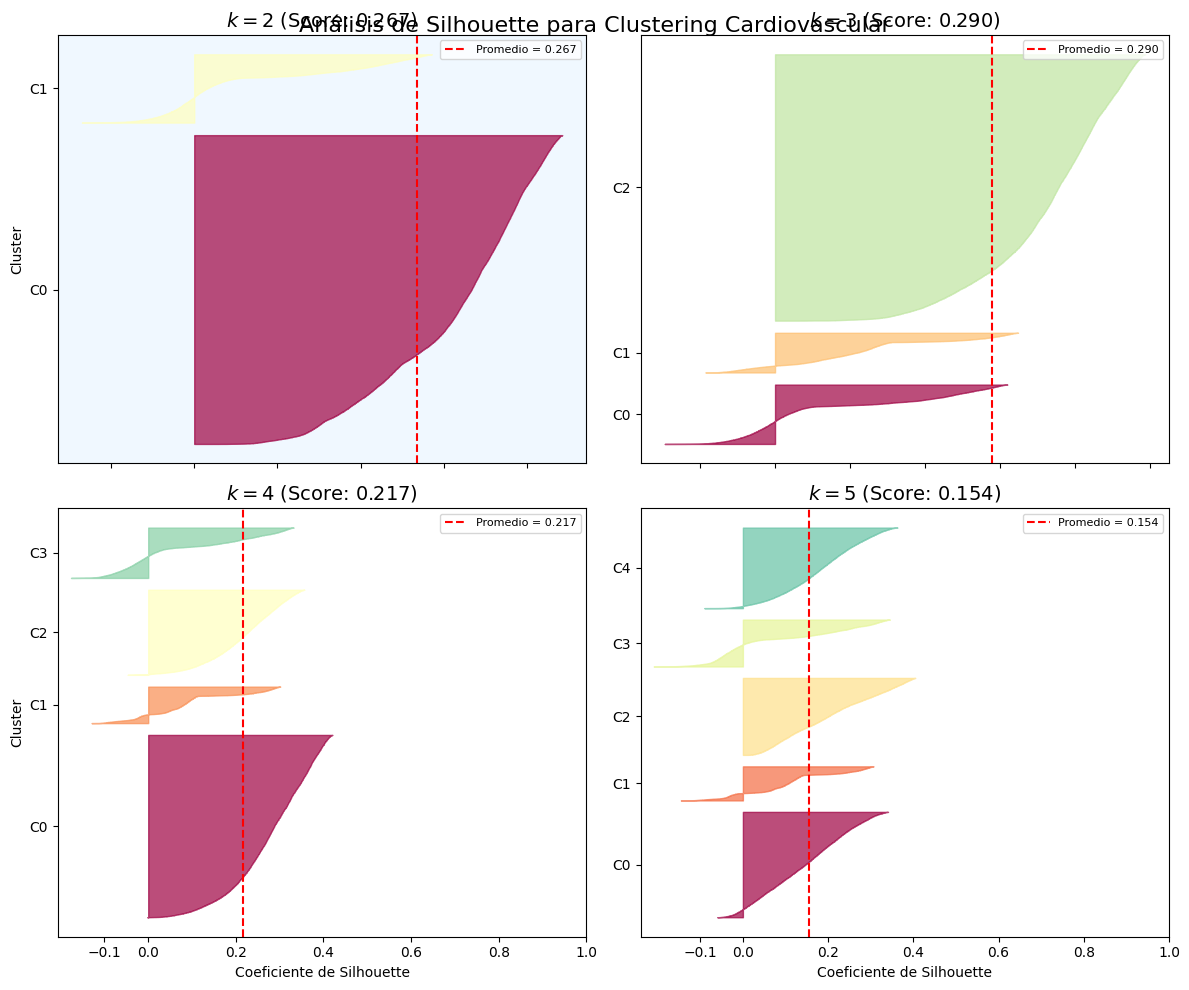


=== ANÁLISIS DETALLADO PARA K=2 ===
Silhouette Score promedio para k=2: 0.267
Cluster 0:
  - Tamaño: 56754 pacientes
  - Silhouette promedio: 0.312
  - Silhouette mínimo: 0.006
  - Silhouette máximo: 0.442
Cluster 1:
  - Tamaño: 12547 pacientes
  - Silhouette promedio: 0.065
  - Silhouette mínimo: -0.135
  - Silhouette máximo: 0.285

=== INTERPRETACIÓN ===
❌ Clusters poco definidos o solapados (score < 0.3)
ℹ️ Según Silhouette Score, k=3 sería mejor, pero k=2 es apropiado para el problema médico binario


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Entrenar K-means para diferentes valores de k alrededor de k=2
k_range = range(2, 6)  # k = 2, 3, 4, 5
kmeans_models = []
silhouette_scores = []

print("Calculando silhouette scores...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, y_pred)
    silhouette_scores.append(silhouette_avg)
    kmeans_models.append(kmeans)
    print(f"k={k}: Silhouette Score = {silhouette_avg:.3f}")

print(f"\nMejor k según Silhouette Score: k={k_range[silhouette_scores.index(max(silhouette_scores))]} (score: {max(silhouette_scores):.3f})")


plt.figure(figsize=(12, 10))

for idx, k in enumerate(k_range):
    plt.subplot(2, 2, idx + 1)
    
    y_pred = kmeans_models[idx].labels_
    silhouette_coefficients = silhouette_samples(X_scaled, y_pred)
    
    padding = len(X_scaled) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        
        color = mpl.cm.Spectral(i / k)
        
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter([f"C{i}" for i in range(k)]))
    
    if idx % 2 == 0:  # Primera columna
        plt.ylabel("Cluster")
    
    if idx >= 2:  # Fila inferior
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Coeficiente de Silhouette")
    else:
        plt.tick_params(labelbottom=False)
    
    plt.axvline(x=silhouette_scores[idx], color="red", linestyle="--", 
                label=f"Promedio = {silhouette_scores[idx]:.3f}")
    
    plt.title(f"$k={k}$ (Score: {silhouette_scores[idx]:.3f})", fontsize=14)
    
    # Resaltar k=2 si es el mejor
    if k == 2:
        plt.gca().patch.set_facecolor('#f0f8ff')  # Fondo azul claro
    
    plt.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.suptitle('Análisis de Silhouette para Clustering Cardiovascular', 
             fontsize=16, y=0.98)
plt.show()

# Análisis específico para k=2 
print(f"\n=== ANÁLISIS DETALLADO PARA K=2 ===")
k2_model = kmeans_models[0]  # k=2 es el primero en la lista
k2_labels = k2_model.labels_
k2_silhouette_coeffs = silhouette_samples(X_scaled, k2_labels)

print(f"Silhouette Score promedio para k=2: {silhouette_scores[0]:.3f}")

# Análisis por cluster
for i in range(2):
    cluster_silhouette_coeffs = k2_silhouette_coeffs[k2_labels == i]
    print(f"Cluster {i}:")
    print(f"  - Tamaño: {len(cluster_silhouette_coeffs)} pacientes")
    print(f"  - Silhouette promedio: {cluster_silhouette_coeffs.mean():.3f}")
    print(f"  - Silhouette mínimo: {cluster_silhouette_coeffs.min():.3f}")
    print(f"  - Silhouette máximo: {cluster_silhouette_coeffs.max():.3f}")

# Interpretación automática
print(f"\n=== INTERPRETACIÓN ===")
if silhouette_scores[0] > 0.5:
    print("✅ Clusters bien definidos y separados (score > 0.5)")
elif silhouette_scores[0] > 0.3:
    print("⚠️ Clusters moderadamente definidos (score 0.3-0.5)")
else:
    print("❌ Clusters poco definidos o solapados (score < 0.3)")

# Comparación con otros valores de k
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
if best_k == 2:
    print(f"🎯 k=2 es óptimo según Silhouette Score")
else:
    print(f"ℹ️ Según Silhouette Score, k={best_k} sería mejor, pero k=2 es apropiado para el problema médico binario")

## 2. Aprendizaje por Refuerzo

Aplicamos Aprendizaje por Refuerzo para que un agente pueda jugar cuatro en raya.

In [52]:
import numpy as np

class Board():
    def __init__(self):
        self.rows = 6
        self.cols = 7
        self.state = np.zeros((self.rows, self.cols))

    def valid_moves(self):
        return [col for col in range(self.cols) if self.state[0, col] == 0]

    def update(self, symbol, col):
        if self.state[0, col] != 0:
            raise ValueError("¡Movimiento ilegal!")
        for row in range(self.rows-1, -1, -1):
            if self.state[row, col] == 0:
                self.state[row, col] = symbol
                return

    def is_game_over(self):
        for r in range(self.rows):
            for c in range(self.cols):
                if self.state[r][c] == 0:
                    continue
                symbol = self.state[r][c]
                # horizontal
                if c <= self.cols - 4 and all(self.state[r][c+i] == symbol for i in range(4)):
                    return symbol
                # vertical
                if r <= self.rows - 4 and all(self.state[r+i][c] == symbol for i in range(4)):
                    return symbol
                # diagonal derecha
                if r <= self.rows - 4 and c <= self.cols - 4 and all(self.state[r+i][c+i] == symbol for i in range(4)):
                    return symbol
                # diagonal izquierda
                if r <= self.rows - 4 and c >= 3 and all(self.state[r+i][c-i] == symbol for i in range(4)):
                    return symbol
        if len(self.valid_moves()) == 0:
            return 0  # empate
        return None

    def reset(self):
        self.state = np.zeros((self.rows, self.cols))


from tqdm import tqdm

class Game():
    def __init__(self, player1, player2):
        player1.symbol = 1
        player2.symbol = -1
        self.players = [player1, player2]
        self.board = Board()

    def selfplay(self, rounds=100):
        wins = [0, 0]
        for _ in tqdm(range(rounds)):
            self.board.reset()
            for player in self.players:
                player.reset()
            game_over = False
            while not game_over:
                for player in self.players:
                    action = player.move(self.board)
                    self.board.update(player.symbol, action)
                    for player in self.players:
                        player.update(self.board)
                    if self.board.is_game_over() is not None:
                        game_over = True
                        break
            self.reward()
            for ix, player in enumerate(self.players):
                if self.board.is_game_over() == player.symbol:
                    wins[ix] += 1
        return wins

    def reward(self):
        winner = self.board.is_game_over()
        if winner == 0:  # empate
            for player in self.players:
                player.reward(0.5)
        else:
            for player in self.players:
                if winner == player.symbol:
                    player.reward(1)
                else:
                    player.reward(0)


class Agent():
    def __init__(self, alpha=0.5, prob_exp=0.5):
        self.value_function = {}
        self.alpha = alpha
        self.positions = []
        self.prob_exp = prob_exp

    def reset(self):
        self.positions = []

    def move(self, board, explore=True):
        valid_moves = board.valid_moves()
        if explore and np.random.uniform(0, 1) < self.prob_exp:
            return np.random.choice(valid_moves)
        max_value = -1000
        for col in valid_moves:
            next_board = board.state.copy()
            for row in range(board.rows - 1, -1, -1):
                if next_board[row, col] == 0:
                    next_board[row, col] = self.symbol
                    break
            next_state = str(next_board.reshape(board.rows * board.cols))
            value = self.value_function.get(next_state, 0)
            if value >= max_value:
                max_value = value
                best_col = col
        return best_col

    def update(self, board):
        self.positions.append(str(board.state.reshape(board.rows * board.cols)))

    def reward(self, reward):
        for p in reversed(self.positions):
            if p not in self.value_function:
                self.value_function[p] = 0
            self.value_function[p] += self.alpha * (reward - self.value_function[p])
            reward = self.value_function[p]

# Entrenamiento
agent1 = Agent(prob_exp=0.5)
agent2 = Agent()
game = Game(agent1, agent2)
game.selfplay(100000)

# Guardar resultados
import pandas as pd
funcion_de_valor = sorted(agent1.value_function.items(), key=lambda kv: kv[1], reverse=True)
tabla = pd.DataFrame({'estado': [x[0] for x in funcion_de_valor], 'valor': [x[1] for x in funcion_de_valor]})
print(tabla.head())

import pickle
with open('agente4enraya.pickle', 'wb') as handle:
    pickle.dump(agent1.value_function, handle, protocol=pickle.HIGHEST_PROTOCOL)


100%|██████████| 100000/100000 [28:53<00:00, 57.68it/s]


                                              estado  valor
0  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  ...    1.0
1  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  ...    1.0
2  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  ...    1.0
3  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  ...    1.0
4  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  ...    1.0
